In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

28.07090076506607 -109.64479851974632
-82.50501325499098 -50.80843773383597
-15.945398199954894 -95.26126699576068
-36.778924019255385 -178.91160355785848
33.27022138531147 -94.02217660547497
-40.34093511974702 -70.20029210851196
8.205122259425664 109.70427356675776
13.073631554099634 171.9079190341406
-24.863827222564026 -78.79298526849982
84.72054826888868 -126.36900209076529
47.018597469103014 -84.20692205121759
9.156952708360137 22.40521809815587
-40.54431237157125 150.88518628389068
72.41467333216264 53.080591029443895
-36.843973285042 156.95839253136558
-34.40630146925492 27.618805297559703
-82.97235251887815 -46.91054291647737
38.61401047309397 39.12862172723706
54.74653515204909 8.946161157736697
29.687692537446736 -107.22141360017973
-66.26172869575265 65.73991891525714
26.560635135843242 -113.7770724517539
-88.42306102569704 -158.90500169711817
63.26424797329713 -25.492112920510465
-0.5892823386409276 -165.54393993644157
-47.23226573501766 -123.14764613502162
-67.562860534939

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
                             

611

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5982fce8ddc76bb4905c922cdb6b69ca


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | cocorit
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | texarkana
Processing Record 6 of Set 1 | san carlos de bariloche
Processing Record 7 of Set 1 | phan thiet
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | taltal
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | sault sainte marie
Processing Record 12 of Set 1 | ouadda
Processing Record 13 of Set 1 | launceston
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | nelson bay
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | cermik
Processing Record 18 of Set 1 | tonder
Processing Record 19 of Set 1 | san buenaventura
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | guerrero negro
Processing Record 22 of Set 1 | mataura
P

Processing Record 37 of Set 4 | ulaangom
Processing Record 38 of Set 4 | arona
Processing Record 39 of Set 4 | fort nelson
Processing Record 40 of Set 4 | lasa
Processing Record 41 of Set 4 | thompson
Processing Record 42 of Set 4 | steamboat springs
Processing Record 43 of Set 4 | bereda
Processing Record 44 of Set 4 | hoima
Processing Record 45 of Set 4 | kahului
Processing Record 46 of Set 4 | gazanjyk
Processing Record 47 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 48 of Set 4 | kavaratti
Processing Record 49 of Set 4 | the valley
Processing Record 50 of Set 4 | eyl
Processing Record 1 of Set 5 | bulungu
Processing Record 2 of Set 5 | pacific grove
Processing Record 3 of Set 5 | sennoy
Processing Record 4 of Set 5 | bengkulu
Processing Record 5 of Set 5 | brownsville
Processing Record 6 of Set 5 | tigil
Processing Record 7 of Set 5 | san cristobal
Processing Record 8 of Set 5 | kalmunai
Processing Record 9 of Set 5 | murgab
Processing Record 10 of Set 5 | 

Processing Record 27 of Set 8 | jiddah
City not found. Skipping...
Processing Record 28 of Set 8 | kaeo
Processing Record 29 of Set 8 | tilichiki
Processing Record 30 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 31 of Set 8 | aguas vermelhas
Processing Record 32 of Set 8 | grand-santi
Processing Record 33 of Set 8 | codajas
Processing Record 34 of Set 8 | desaguadero
Processing Record 35 of Set 8 | port keats
Processing Record 36 of Set 8 | churu
Processing Record 37 of Set 8 | flinders
Processing Record 38 of Set 8 | lima
Processing Record 39 of Set 8 | warrnambool
Processing Record 40 of Set 8 | taoudenni
Processing Record 41 of Set 8 | pundaguitan
Processing Record 42 of Set 8 | fortuna
Processing Record 43 of Set 8 | westport
Processing Record 44 of Set 8 | severnyy-kospashskiy
Processing Record 45 of Set 8 | montepulciano
Processing Record 46 of Set 8 | monywa
Processing Record 47 of Set 8 | kruisfontein
Processing Record 48 of Set 8 | maracaibo
Processin

Processing Record 13 of Set 12 | saint-joseph
Processing Record 14 of Set 12 | auchi
Processing Record 15 of Set 12 | nargana
Processing Record 16 of Set 12 | kathu
Processing Record 17 of Set 12 | am timan
Processing Record 18 of Set 12 | ola
Processing Record 19 of Set 12 | clarence town
Processing Record 20 of Set 12 | vershino-shakhtaminskiy
Processing Record 21 of Set 12 | sao joao do piaui
Processing Record 22 of Set 12 | rorvik
Processing Record 23 of Set 12 | quincy
Processing Record 24 of Set 12 | aflu
City not found. Skipping...
Processing Record 25 of Set 12 | dianopolis
City not found. Skipping...
Processing Record 26 of Set 12 | leshukonskoye
Processing Record 27 of Set 12 | walvis bay
Processing Record 28 of Set 12 | areia branca
Processing Record 29 of Set 12 | trinidad
Processing Record 30 of Set 12 | teya
Processing Record 31 of Set 12 | shaowu
Processing Record 32 of Set 12 | pochutla
Processing Record 33 of Set 12 | saint-pierre
Processing Record 34 of Set 12 | bonav

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cocorit,27.5833,-109.9667,89.94,47,4,2.53,MX,2022-07-15 17:12:21
1,Ushuaia,-54.8000,-68.3000,37.06,52,20,8.05,AR,2022-07-15 17:08:06
2,Puerto Ayora,-0.7393,-90.3518,76.96,93,97,8.99,EC,2022-07-15 17:12:21
3,Vaini,-21.2000,-175.2000,75.36,94,20,6.91,TO,2022-07-15 17:12:22
4,Texarkana,33.4251,-94.0477,94.14,48,0,10.00,US,2022-07-15 17:12:22
5,San Carlos De Bariloche,-41.1456,-71.3082,37.44,54,75,13.80,AR,2022-07-15 17:10:11
6,Phan Thiet,10.9333,108.1000,77.81,92,89,7.40,VN,2022-07-15 17:09:54
7,Butaritari,3.0707,172.7902,81.25,82,99,18.23,KI,2022-07-15 17:12:23
8,Taltal,-25.4000,-70.4833,57.72,66,0,5.70,CL,2022-07-15 17:12:24
9,Tuktoyaktuk,69.4541,-133.0374,39.74,73,55,9.66,CA,2022-07-15 17:12:24


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cocorit,MX,2022-07-15 17:12:21,27.5833,-109.9667,89.94,47,4,2.53
1,Ushuaia,AR,2022-07-15 17:08:06,-54.8000,-68.3000,37.06,52,20,8.05
2,Puerto Ayora,EC,2022-07-15 17:12:21,-0.7393,-90.3518,76.96,93,97,8.99
3,Vaini,TO,2022-07-15 17:12:22,-21.2000,-175.2000,75.36,94,20,6.91
4,Texarkana,US,2022-07-15 17:12:22,33.4251,-94.0477,94.14,48,0,10.00
5,San Carlos De Bariloche,AR,2022-07-15 17:10:11,-41.1456,-71.3082,37.44,54,75,13.80
6,Phan Thiet,VN,2022-07-15 17:09:54,10.9333,108.1000,77.81,92,89,7.40
7,Butaritari,KI,2022-07-15 17:12:23,3.0707,172.7902,81.25,82,99,18.23
8,Taltal,CL,2022-07-15 17:12:24,-25.4000,-70.4833,57.72,66,0,5.70
9,Tuktoyaktuk,CA,2022-07-15 17:12:24,69.4541,-133.0374,39.74,73,55,9.66


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

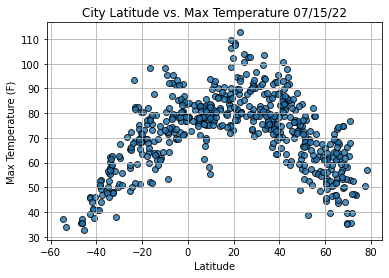

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

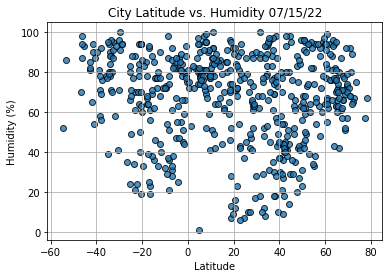

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

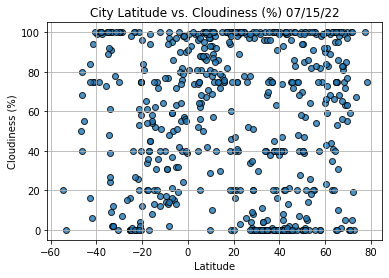

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

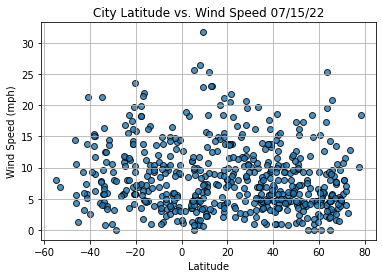

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()